# Importing Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Project
## Tesla Stock Price Predictive Analysis 

In [21]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\Tesla_stock_data.csv")

# Data Info

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3765 entries, 0 to 3764
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3765 non-null   object 
 1   Close   3765 non-null   float64
 2   High    3765 non-null   float64
 3   Low     3765 non-null   float64
 4   Open    3765 non-null   float64
 5   Volume  3765 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 176.6+ KB


In [23]:
df.shape

(3765, 6)

In [24]:
df.head()

,Date,Close,High,Low,Open,Volume
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [25]:
df.describe()

,Close,High,Low,Open,Volume
count,3765.000000,3765.000000,3765.000000,3765.000000,3.765000e+03
mean,88.567852,90.581117,86.465378,88.593070,9.707503e+07
std,113.754319,116.450259,110.987632,113.848771,7.689793e+07
min,1.053333,1.108667,0.998667,1.076000,1.777500e+06
25%,12.506000,12.764667,12.183333,12.446667,5.014650e+07
50%,18.807333,19.118668,18.466667,18.799999,8.319150e+07
75%,191.300003,196.360001,186.339996,191.456665,1.225740e+08
max,479.859985,488.540009,457.510010,475.899994,9.140820e+08


# Data Handling & Cleaning

In [26]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [27]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)


# EDA & Visualization

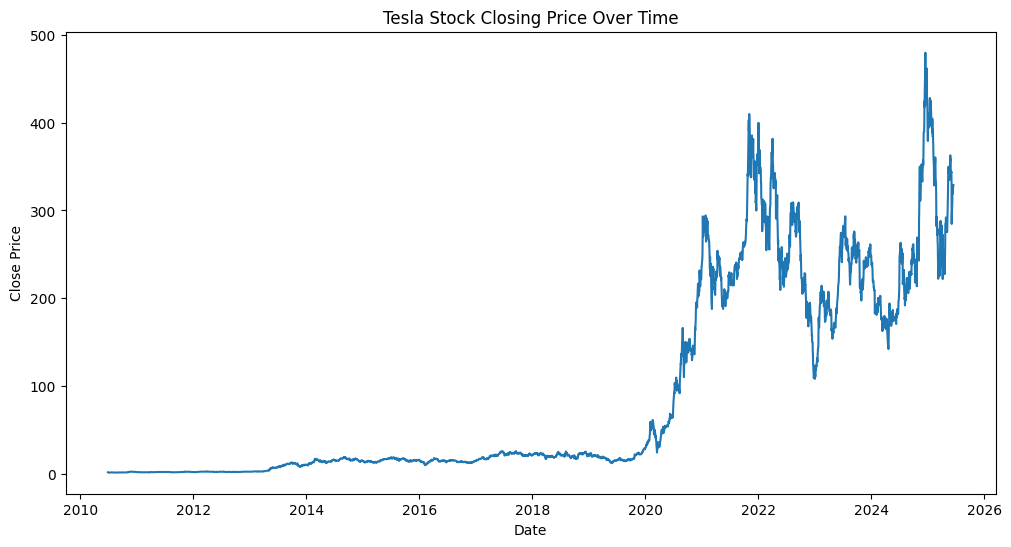

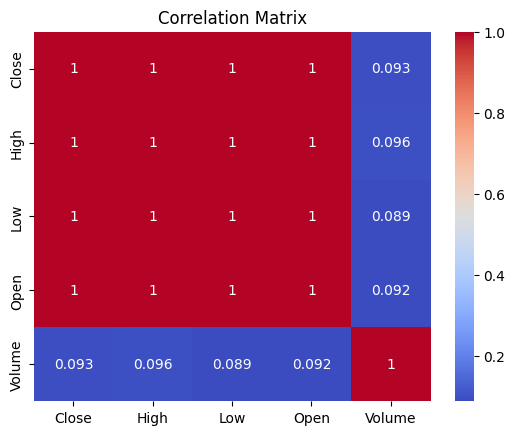

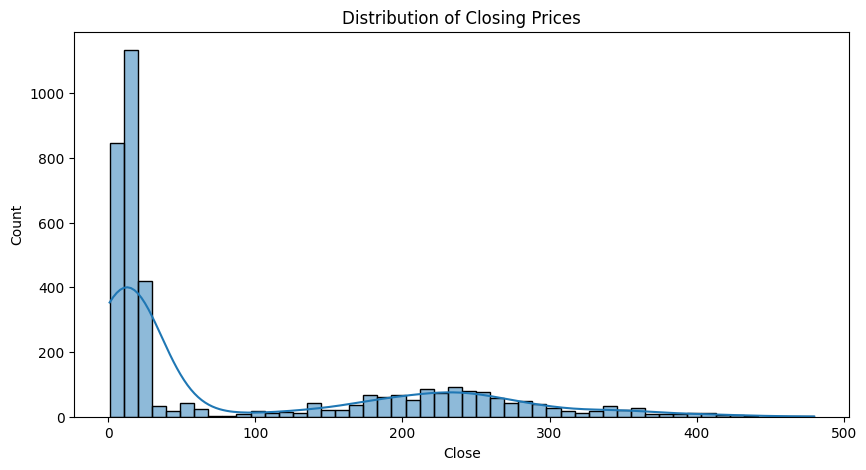

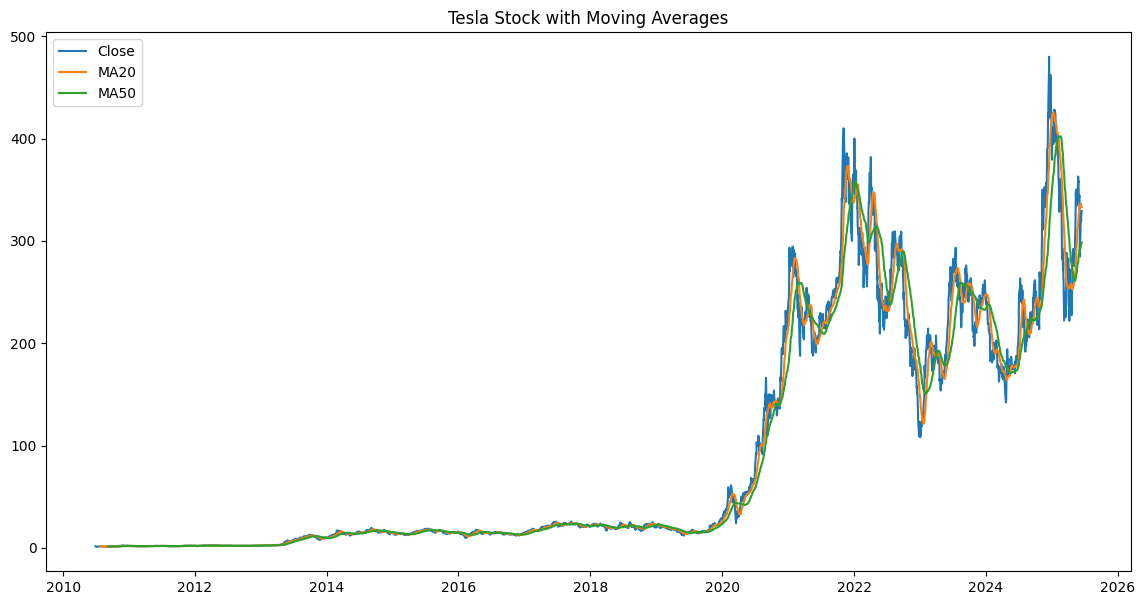

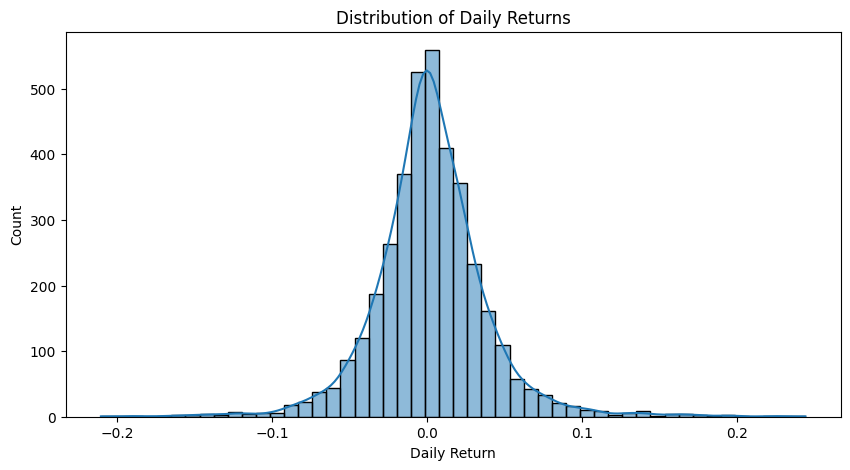

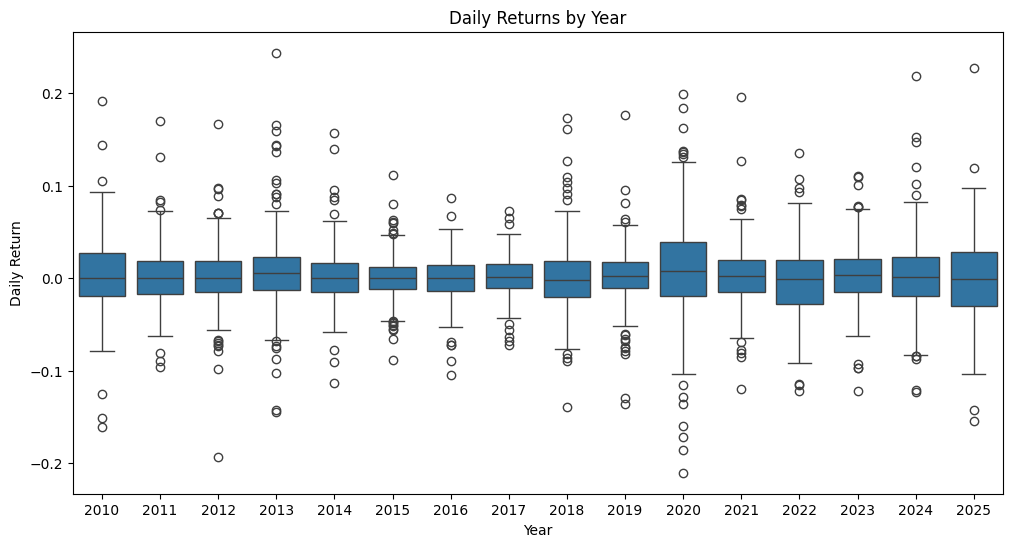

Linear Regression R2: 1.0
Linear Regression RMSE: 1.7273250330794017e-13
Random Forest R2: 0.9840421747774313
Random Forest RMSE: 8.366295242138722


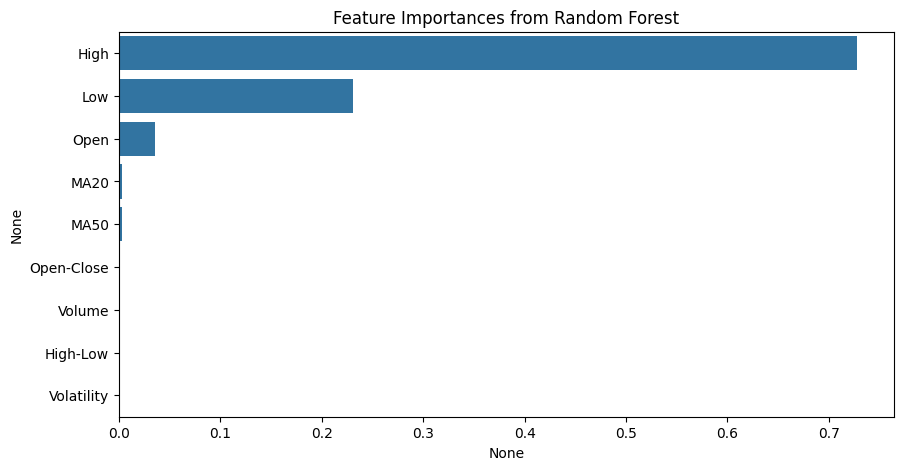

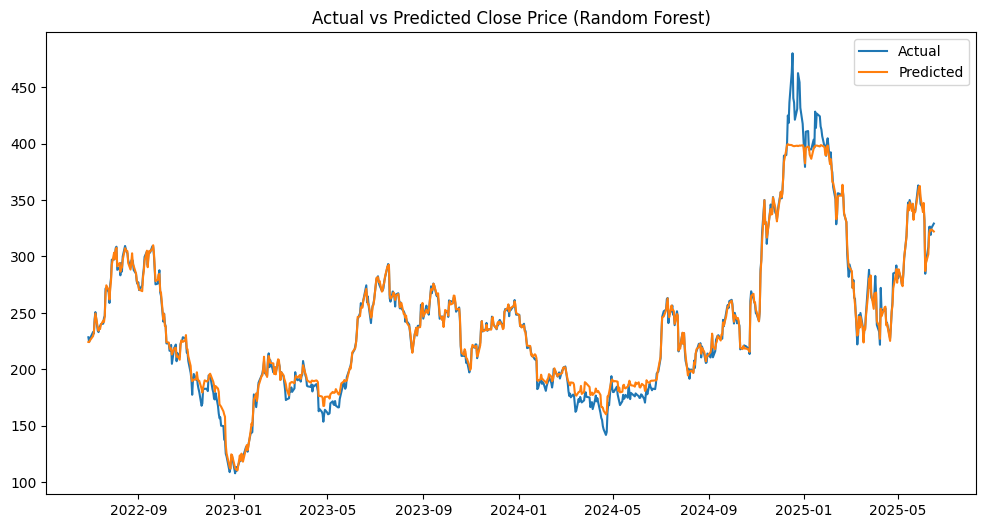

In [28]:
# Advanced EDA
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.title('Tesla Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of Close
plt.figure(figsize=(10,5))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.show()

# Moving averages
df['MA20'] = df['Close'].rolling(20).mean()
df['MA50'] = df['Close'].rolling(50).mean()

plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Close')
plt.plot(df['MA20'], label='MA20')
plt.plot(df['MA50'], label='MA50')
plt.legend()
plt.title('Tesla Stock with Moving Averages')
plt.show()

# Plotly interactive
fig = px.line(df, x=df.index, y='Close', title='Tesla Stock Close Interactive')
fig.show()

# Daily returns
df['Daily Return'] = df['Close'].pct_change()
plt.figure(figsize=(10,5))
sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True)
plt.title('Distribution of Daily Returns')
plt.show()

# Boxplot of daily returns by year
df['Year'] = df.index.year
plt.figure(figsize=(12,6))
sns.boxplot(x='Year', y='Daily Return', data=df)
plt.title('Daily Returns by Year')
plt.show()

# Feature Engineering
df['Open-Close'] = df['Open'] - df['Close']
df['High-Low'] = df['High'] - df['Low']
df['Volatility'] = df['High-Low'] / df['Open']

features = ['Open', 'High', 'Low', 'Volume', 'MA20', 'MA50', 'Open-Close', 'High-Low', 'Volatility']
df.dropna(inplace=True)

# Prepare data
X = df[features]
y = df['Close']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

# Feature importance
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=importances.index)
plt.title('Feature Importances from Random Forest')
plt.show()

# Actual vs Predicted
plt.figure(figsize=(12,6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual')
plt.plot(df.index[-len(y_test):], y_pred_rf, label='Predicted')
plt.title('Actual vs Predicted Close Price (Random Forest)')
plt.legend()
plt.show()